   Hours_Studied  Attendance  Previous_Score  Final_Score
0              1          60              50           52
1              2          65              55           58
2              3          70              60           63
3              4          75              65           68
4              5          80              70           75
    Hours_Studied  Attendance  Previous_Score  Final_Score
15              1          50              45           48
16              9          98              90           95
17             10          99              92           97
18              3          74              66           69
19              6          83              76           82
(20, 4)
Hours_Studied     int64
Attendance        int64
Previous_Score    int64
Final_Score       int64
dtype: object
Hours_Studied     0
Attendance        0
Previous_Score    0
Final_Score       0
dtype: int64


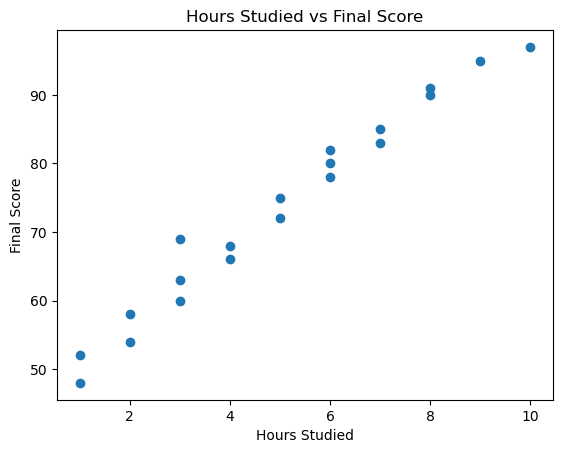

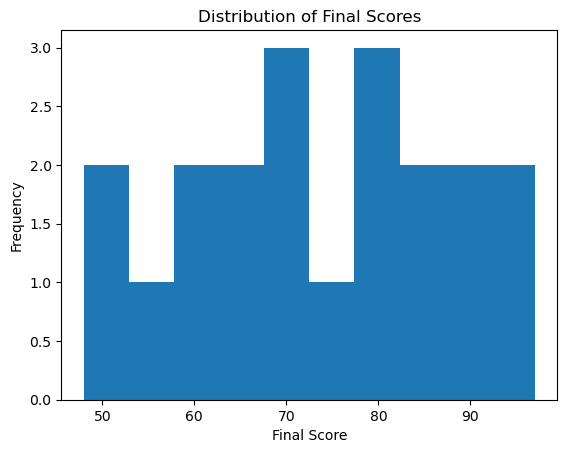

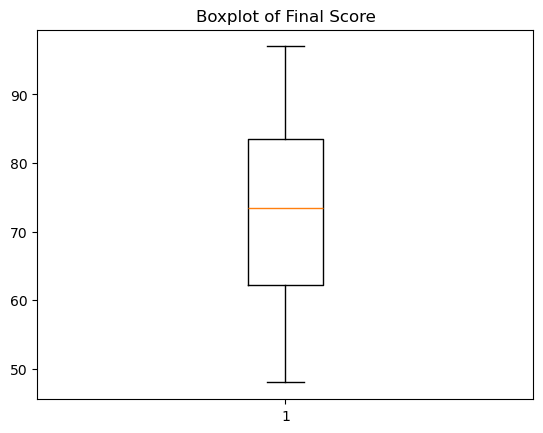

MAE: 0.5755277599234709
R2 Score: 0.9988548817209996
MAE without Attendance: 0.5932403044581402
R2 without Attendance: 0.9987452605343027
MAE with Sleep Hours: 0.6459099290585328
R2 with Sleep Hours: 0.9983494966025929
MAE Full Data: 0.5754611403978362
R2 Full Data: 0.9969493822686103


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


data = {
    "Hours_Studied": [1,2,3,4,5,6,7,8,2,3,4,5,6,7,8,1,9,10,3,6],
    "Attendance": [60,65,70,75,80,85,90,95,55,68,72,78,88,92,96,50,98,99,74,83],
    "Previous_Score": [50,55,60,65,70,75,80,85,52,58,63,68,73,78,88,45,90,92,66,76],
    "Final_Score": [52,58,63,68,75,80,85,90,54,60,66,72,78,83,91,48,95,97,69,82]
}

df = pd.DataFrame(data)

print(df.head())
print(df.tail())
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

plt.figure()
plt.scatter(df["Hours_Studied"], df["Final_Score"])
plt.title("Hours Studied vs Final Score")
plt.xlabel("Hours Studied")
plt.ylabel("Final Score")
plt.show()

plt.figure()
plt.hist(df["Final_Score"])
plt.title("Distribution of Final Scores")
plt.xlabel("Final Score")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.boxplot(df["Final_Score"])
plt.title("Boxplot of Final Score")
plt.show()

X = df[["Hours_Studied", "Attendance", "Previous_Score"]]
y = df["Final_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

X2 = df[["Hours_Studied", "Previous_Score"]]

X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred2 = model2.predict(X2_test)

print("MAE without Attendance:", mean_absolute_error(y_test, y_pred2))
print("R2 without Attendance:", r2_score(y_test, y_pred2))

df["Sleep_Hours"] = [6,7,6,8,7,6,8,7,5,6,7,6,7,8,6,5,8,9,6,7]

X3 = df[["Hours_Studied", "Attendance", "Previous_Score", "Sleep_Hours"]]

X3_train, X3_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=42
)

model3 = LinearRegression()
model3.fit(X3_train, y_train)

y_pred3 = model3.predict(X3_test)

print("MAE with Sleep Hours:", mean_absolute_error(y_test, y_pred3))
print("R2 with Sleep Hours:", r2_score(y_test, y_pred3))

model_full = LinearRegression()
model_full.fit(X, y)

y_full_pred = model_full.predict(X)

print("MAE Full Data:", mean_absolute_error(y, y_full_pred))
print("R2 Full Data:", r2_score(y, y_full_pred))